target: 'Best Performance'  
split 70-30, random state: 2020

1. Bersihkan data  
2. Buat analisa singkat hubungan antara fitur dan target 
3. Buat skema preprosessing   
4. Pilih fitur menggunakan  :
    * univariate statistics
    * iterative feature selection  

Gunakan model:  
* Decision Tree Classifier
* Logistic Regression

Bandingkan performa model dan fitur yang terpilih.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('BRI.csv')
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [4]:
df = df.drop(columns=['number_of_dependences (male)', 'number_of_dependences (female)']) # drop karena sudah terwakili number_of_dependences

In [5]:
df.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


In [6]:
datanull = []
for i in df.columns:
    datanull.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(df[i].isna().sum()/df.shape[0]*100),
        df[i].nunique()
    ])
    
desc = pd.DataFrame(data=datanull, columns=['Data Features','Data Types','Null','% Null','Nunique'])
desc

,Data Features,Data Types,Null,% Null,Nunique
0,job_level,object,0,0,4
1,job_duration_in_current_job_level,float64,0,0,102
2,person_level,object,0,0,8
3,job_duration_in_current_person_level,float64,0,0,86
4,job_duration_in_current_branch,float64,0,0,71
5,Employee_type,object,12,0,3
6,Employee_status,object,0,0,2
7,gender,object,0,0,2
8,age,int64,0,0,37
9,marital_status_maried(Y/N),object,0,0,2


# Data Cleaning

In [7]:
df.columns[df.dtypes == object]

Index(['job_level', 'person_level', 'Employee_type', 'Employee_status',
       'gender', 'marital_status_maried(Y/N)', 'Education_level',
       'year_graduated', 'achievement_target_1', 'achievement_target_2',
       'achievement_target_3'],
      dtype='object')

In [8]:
# year_graduated
df['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', nan, '2008', '2011', '2010',
       '2013', '2014', '\\N', '1996', '2009', '2005', '2012', '1989',
       '1992', '0', '2000', '1994', '1997', '1993', '1995', '2004',
       '2015', '1986', '1999', '2003', '2016', '2044', '2018', '1991',
       '2002', '2017', '2201', '1998', '1990', '9999', '1984', '2020',
       '1988', '1983', '1985', '201', '2019', '2031', '____', '3016', '-',
       '2200', '102', '2999', '9464'], dtype=object)

In [9]:
df['year_graduated'].replace(['\\N','0','2044','2201','2201','201','2031','____', '3016', '-',
       '2200', '102', '2999', '9464'], np.nan, inplace=True)

In [10]:
df['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', nan, '2008', '2011', '2010',
       '2013', '2014', '1996', '2009', '2005', '2012', '1989', '1992',
       '2000', '1994', '1997', '1993', '1995', '2004', '2015', '1986',
       '1999', '2003', '2016', '2018', '1991', '2002', '2017', '1998',
       '1990', '9999', '1984', '2020', '1988', '1983', '1985', '2019'],
      dtype=object)

In [11]:
# achievement_target_1
df['achievement_target_1'].unique()

array(['achiev_50%-100%', 'achiev_100%-150%', 'achiev_< 50%',
       'achiev_> 1.5', nan, 'Tidak diberikan target',
       'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian < 50%',
       'Pencapaian > 1.5'], dtype=object)

In [12]:
df['achievement_target_1'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df['achievement_target_1'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)
df['achievement_target_1'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df['achievement_target_1'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)

In [13]:
df['achievement_target_1'].value_counts()

Pencapaian 50%-100%       9210
Pencapaian 100%-150%      3004
Pencapaian < 50%          2240
Pencapaian > 1.5           646
Tidak diberikan target     178
Name: achievement_target_1, dtype: int64

In [14]:
# achievement_target_2
df['achievement_target_2'].unique()

array(['achiev_< 50%', 'achiev_50%-100%', 'achiev_> 1.5',
       'achiev_100%-150%', nan, 'Tidak diberikan target',
       'Pencapaian 100%-150%', 'Pencapaian < 50%', 'Pencapaian 50%-100%',
       'Pencapaian > 1.5'], dtype=object)

In [15]:
df['achievement_target_2'].replace('achiev_< 50%', 'Pencapaian < 50%', inplace=True)
df['achievement_target_2'].replace('achiev_50%-100%', 'Pencapaian 50%-100%', inplace=True)
df['achievement_target_2'].replace('achiev_> 1.5', 'Pencapaian > 1.5', inplace=True)
df['achievement_target_2'].replace('achiev_100%-150%', 'Pencapaian 100%-150%', inplace=True)

In [16]:
df['achievement_target_2'].value_counts()

Pencapaian < 50%          10157
Pencapaian 50%-100%        2850
Pencapaian 100%-150%       1070
Pencapaian > 1.5           1025
Tidak diberikan target      176
Name: achievement_target_2, dtype: int64

In [17]:
# achievement_target_3
df['achievement_target_3'].unique()

array(['reached', 'not_reached', nan, 'not reached'], dtype=object)

In [18]:
# age
df['age'] = 2021 - df['age']

# Missing Values

In [19]:
df.columns[df.isnull().any()]

Index(['Employee_type', 'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [20]:
from scipy.stats import normaltest
nominal = ['GPA','job_duration_as_permanent_worker', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal']
for i in nominal:
    print(i, normaltest(df[i].dropna()))
# karena pval <0.05 maka pakai median

GPA NormaltestResult(statistic=45416.24215488508, pvalue=0.0)
job_duration_as_permanent_worker NormaltestResult(statistic=13178.49290924702, pvalue=0.0)
Avg_achievement_% NormaltestResult(statistic=71.82699209548835, pvalue=2.5291048860584466e-16)
Last_achievement_% NormaltestResult(statistic=147.20378663946582, pvalue=1.0841861963054956e-32)
Achievement_above_100%_during3quartal NormaltestResult(statistic=2643.6580207652582, pvalue=0.0)


SimpleImputer (mode) =     'Employee_type', 'Education_level', 'year_graduated','achievement_target_1', 'achievement_target_2', 'achievement_target_3'
SimpleImputer (median) = 'GPA','job_duration_as_permanent_worker','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal'
    

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
imputer = SimpleImputer(strategy='most_frequent') 
df[['Employee_type', 'Education_level', 'year_graduated','achievement_target_1', 'achievement_target_2', 'achievement_target_3']] = imputer.fit_transform(df[[ 'Employee_type', 'Education_level', 'year_graduated','achievement_target_1', 'achievement_target_2', 'achievement_target_3']]) 

In [23]:
imputer = SimpleImputer(strategy='median')
df[['GPA','job_duration_as_permanent_worker','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal']] = imputer.fit_transform(df[['GPA','job_duration_as_permanent_worker','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal']]) 

In [24]:
df.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Best Performance                         0
Avg_achievement_%                        0
Last_achiev

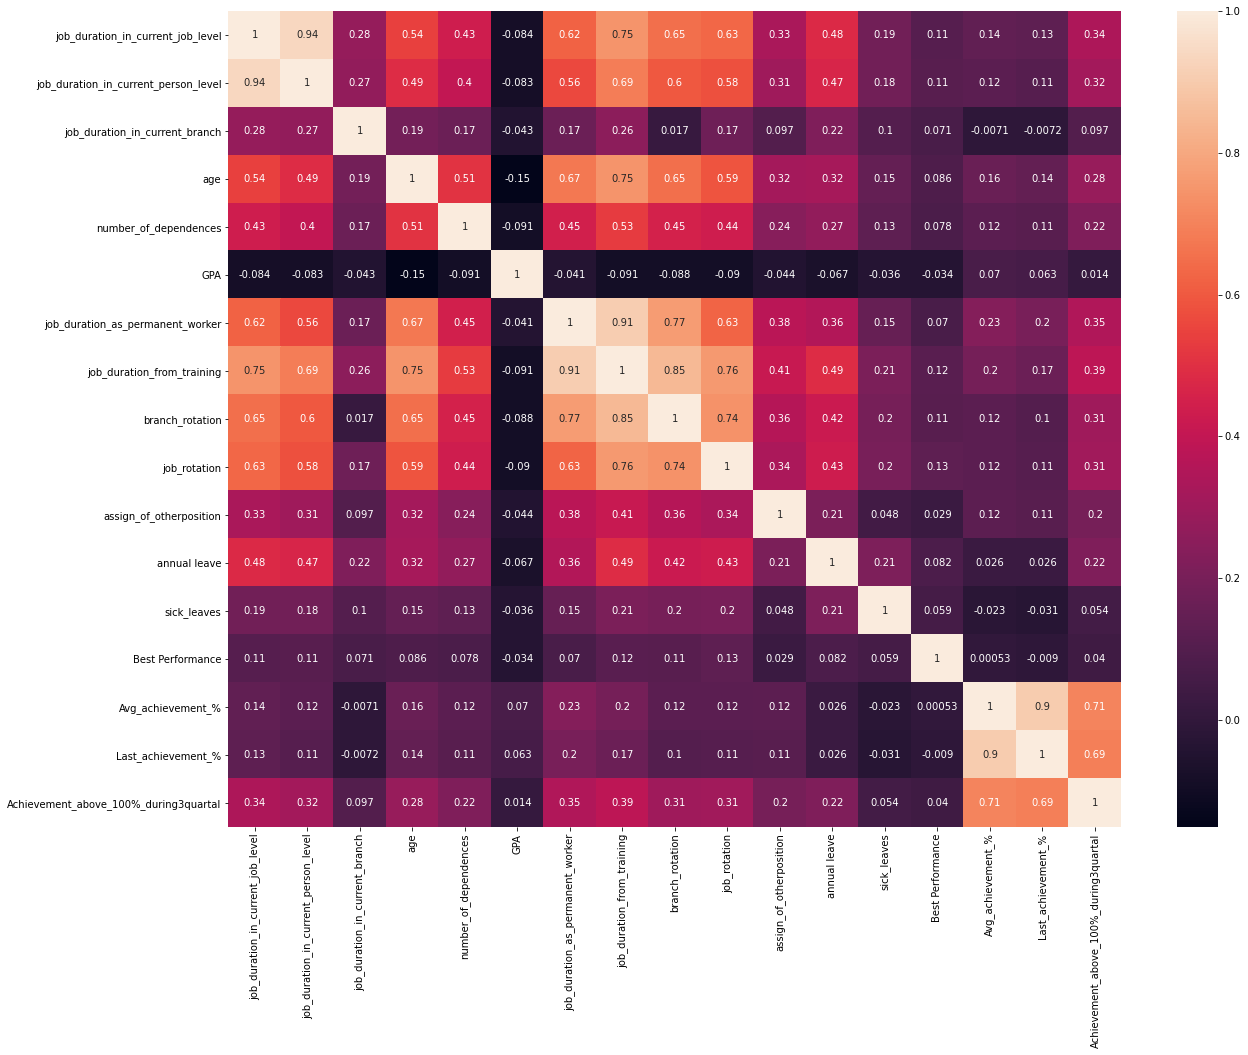

In [25]:
plt.figure(figsize=(20,15))
corr = df.corr('spearman')
sns.heatmap(corr,annot=True)
plt.show()

# Encoding

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [27]:
df.columns[df.dtypes=='object']

Index(['job_level', 'person_level', 'Employee_type', 'Employee_status',
       'gender', 'marital_status_maried(Y/N)', 'Education_level',
       'year_graduated', 'achievement_target_1', 'achievement_target_2',
       'achievement_target_3'],
      dtype='object')

In [28]:
df.columns[df.dtypes!='object']

Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

OneHotEncoder = 
        'Employee_status','gender', 'marital_status_maried(Y/N)', 
        
OrdinalEncoder = 
           'job_level','person_level','Employee_type','Education_level','achievement_target_1','achievement_target_2','achievement_target_3'
        
RobustScaler = 
        'job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch', 'age', 'job_duration_as_permanent_worker','job_duration_from_training','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal'
       
No treatment = 
        'year_graduated', 'number_of_dependences', 'GPA','branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance',

In [29]:
df['achievement_target_2'].unique()

array(['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian > 1.5',
       'Pencapaian 100%-150%', 'Tidak diberikan target'], dtype=object)

In [30]:
ordinal_mapping = [
    {'col':'job_level',
    'mapping':{None:0,'JG03':1,'JG04':2,'JG05':3,'JG06':4}},
    {'col':'person_level',
    'mapping':{None:0,'PG01':1,'PG02':2,'PG03':3,'PG04':4,'PG05':5,'PG06':6,'PG07':7,'PG08':8}},
    {'col':'Employee_type',
    'mapping':{None:0,'RM_type_A':1,'RM_type_C':2,'RM_type_B':3}},
    {'col':'Education_level',
    'mapping':{'level_0':0,'level_1':1,'level_2':2,'level_3':3,'level_4':4,'level_5':5 }},
    {'col':'achievement_target_1',
    'mapping':{'Tidak diberikan target':0,'Pencapaian < 50%':1,'Pencapaian 50%-100%':2,'Pencapaian 100%-150%':3,'Pencapaian > 1.5':4}},
    {'col':'achievement_target_2',
    'mapping':{'Tidak diberikan target':0,'Pencapaian < 50%':1,'Pencapaian 50%-100%':2,'Pencapaian 100%-150%':3,'Pencapaian > 1.5':4}},
    {'col':'achievement_target_3',
    'mapping':{'Tidak diberikan target':0,'Pencapaian < 50%':1,'Pencapaian 50%-100%':2,'Pencapaian 100%-150%':3,'Pencapaian > 1.5':4}},
]
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [31]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Employee_status','gender', 'marital_status_maried(Y/N)']),
    ('Ordinal', ordinal_encoder, ['job_level', 'person_level', 'Employee_type','Education_level','achievement_target_1', 'achievement_target_2',
       'achievement_target_3']),
    ('impute scaling', RobustScaler(), ['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch', 'age', 'job_duration_as_permanent_worker','job_duration_from_training','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal'])
], remainder='passthrough') 

# Splitting Data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x= df.drop(columns=['Best Performance'])
y= df['Best Performance']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=10)

# Data Transform

In [35]:
x_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
20119,JG04,1.58,PG03,1.58,0.50,RM_type_A,Permanent,Female,40,Y,2,level_4,3.27,2003,6.0,6,4,3,0,3,0,79.546667,87.94,1.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
249,JG04,1.58,PG03,1.58,0.42,RM_type_A,Permanent,Male,33,Y,1,level_4,3.19,2012,5.0,5,3,4,6,4,0,63.486667,67.73,0.0,Pencapaian 100%-150%,Pencapaian < 50%,reached
3231,JG04,7.42,PG04,3.50,0.50,RM_type_A,Permanent,Male,38,Y,1,level_4,3.01,2006,7.0,7,6,4,0,0,0,88.433333,96.10,2.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
10613,JG04,1.92,PG03,1.92,0.50,RM_type_A,Permanent,Male,33,Y,1,level_4,0.00,2011,5.0,5,3,4,0,8,2,67.366667,68.99,0.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
5369,JG04,8.00,PG04,4.50,0.50,RM_type_C,Permanent,Female,48,N,0,level_4,3.00,1996,19.0,19,8,7,0,0,0,88.026667,91.19,2.0,Pencapaian 50%-100%,Pencapaian 50%-100%,not reached


In [36]:
x_train_preprocessed = pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed = pd.DataFrame(transformer.fit_transform(x_test))

In [37]:
transformer.transformers_

[('One Hot',
  OneHotEncoder(),
  ['Employee_status', 'gender', 'marital_status_maried(Y/N)']),
 ('Ordinal',
  OrdinalEncoder(cols=['job_level', 'person_level', 'Employee_type',
                       'Education_level', 'achievement_target_1',
                       'achievement_target_2', 'achievement_target_3'],
                 mapping=[{'col': 'job_level',
                           'mapping': {None: 0, 'JG03': 1, 'JG04': 2, 'JG05': 3,
                                       'JG06': 4}},
                          {'col': 'person_level',
                           'mapping': {None: 0, 'PG01': 1, 'PG02': 2, 'PG03': 3,
                                       'PG04': 4, 'PG05': 5, 'PG06': 6, 'PG07': 7,
                                       'PG08': 8}},...
                                       'Pencapaian > 1.5': 4,
                                       'Tidak diberikan target': 0}},
                          {'col': 'achievement_target_2',
                           'mapping': {'Penca

In [38]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Contract', 'x0_Permanent', 'x1_Female', 'x1_Male', 'x2_N',
       'x2_Y'], dtype=object)

In [39]:
transformer.transformers_[1][1].get_feature_names()

['job_level',
 'person_level',
 'Employee_type',
 'Education_level',
 'achievement_target_1',
 'achievement_target_2',
 'achievement_target_3']

In [46]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch', 'age', 'job_duration_as_permanent_worker','job_duration_from_training','Avg_achievement_%','Last_achievement_%','Achievement_above_100%_during3quartal'] + ['year_graduated', 'number_of_dependences', 'GPA','branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves']

In [49]:
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features

# Model Fitting and Evaluation

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [53]:
tree = DecisionTreeClassifier(max_depth = 5, criterion='entropy')
tree.fit(x_train_preprocessed, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
y_predict = tree.predict(x_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_predict))
print('akurasi:',accuracy_score(y_test,y_predict))

mse: 0.1212286441294075
akurasi: 0.8787713558705925


In [55]:
importance_table = pd.DataFrame({
    'imp':tree.feature_importances_
}, index = features)
importance_table

,imp
x0_Contract,0.055085
x0_Permanent,0.000000
x1_Female,0.000000
x1_Male,0.000000
x2_N,0.000000
x2_Y,0.014455
job_level,0.000000
person_level,0.000000
Employee_type,0.000000
Education_level,0.000000


<AxesSubplot:>

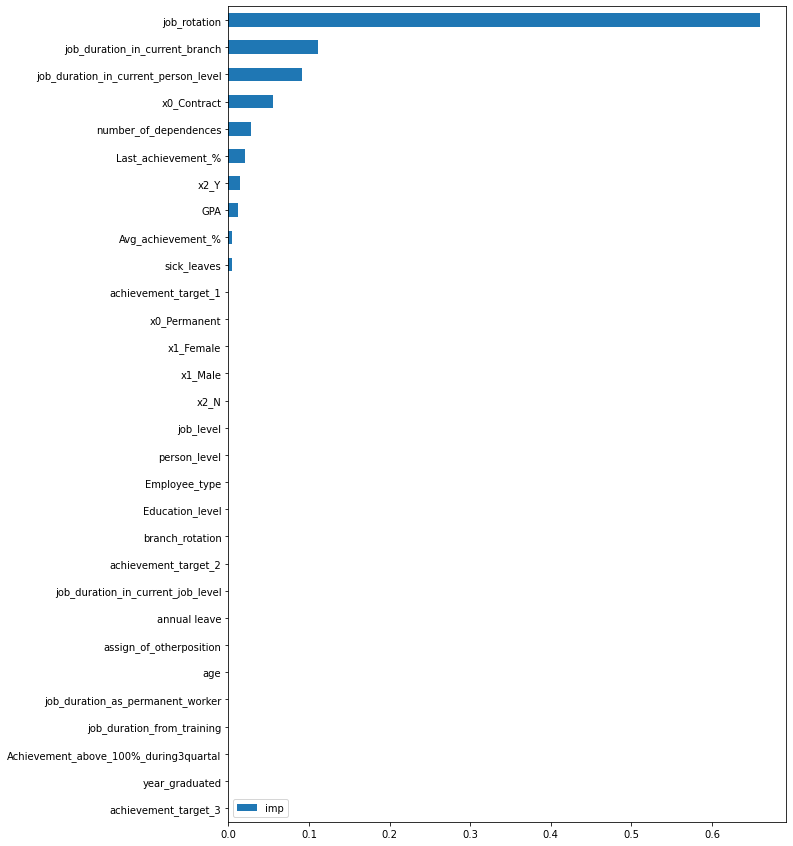

In [56]:
importance_table.sort_values('imp').plot(kind = 'barh', figsize = (10,15))